In [1]:
%matplotlib notebook
from astropy import units as u

from elisa import BinarySystem
from elisa import Star

# Demo No. 4 - Spots

This demo will demonstrate how to generate spots on the surface of the binary component.

## Generating spot metadata

Before the standard procedure of defining the components and the binary system itself, lets first specify our spots on the primary component.

In [2]:
spots_primary = [
    #  Spot 1
    {"longitude": 0,
     "latitude": 45,
     "angular_radius": 27,
     "temperature_factor": 1.05,
#      "discretization_factor": 2,
    },
    #  Spot 2
    {"longitude": 30,
     "latitude": 30,
     "angular_radius": 15,
     "temperature_factor": 0.98,
    },
    #  Spot 3
    {"longitude": 40,
     "latitude": 50,
     "angular_radius": 15,
     "temperature_factor": 1.02,
    },
    #  Spot 4
    {"longitude": 0,
     "latitude": 50,
     "angular_radius": 8,
     "temperature_factor": 0.98,
    },
]

Spots itself are defined using a list of dictionaries where each dictionary defines one spot. Each spot is defined by 4 parameters `longitude`, `latitude`, `angular_radius` and `temperature_factor` = $T_{spot}/T_{star}$. Discretization factor of the each spot can be specifyied with `discretization_factor` keyword, but by default they are set automatically based on discretization factor of the parent star or the size of the spot in case of small spots. Order in which the spots are defined is important in case of overlaping spots, since the spot defined later will lay on top of the overlapping counterpart (eg. `Spot 2` will lay on top of the `Spot 1`). 

## Generating a binary system

The binary system and its components will be generated in very similar fashion to previous exercises with small addition to component arguments in order to define spots:

Now we can build a system in the same way as in the previous demo:

In [3]:
primary = Star(
    mass=2.15 * u.solMass,
    surface_potential=3.6,
    synchronicity=1.0,
    t_eff=10000 * u.K,
    gravity_darkening=1.0,
    discretization_factor=4, 
    albedo=0.6,
    metallicity=0.0,
    spots = spots_primary  # here we specify the spots present on the primary component
)

secondary = Star(
    mass=1.2 * u.solMass,
    surface_potential=4.0,
    synchronicity=1.0,
    t_eff=7000 * u.K,
    gravity_darkening=1.0,
    # discretization_factor=20,
    albedo=0.6,
    metallicity=0,  # similarly, spots can be added to the secondary component as well
)

bs = BinarySystem(
    primary=primary,
    secondary=secondary,
    argument_of_periastron=58 * u.deg,
    gamma=-30.7 * u.km / u.s,
    period=2.5 * u.d,
    eccentricity=0.2,
    inclination=85 * u.deg,
    primary_minimum_time=2440000.0 * u.d,
    phase_shift=0.0,
)

2021-04-23 10:47:17,789 - 26742 - binary_system.system - INFO: initialising object BinarySystem
2021-04-23 10:47:17,865 - 26742 - binary_system.system - INFO: setting discretization factor of secondary component to 6.63 according to discretization factor of the primary component.


## Data access and visualization

Initially, we will initialize orbital position container and calculate geometry of the components:

In [4]:
phase = 0.2

orbital_position_container = bs.build_container(phase=phase)

2021-04-23 10:47:23,075 - 26742 - binary_system.system - INFO: Orbital position container was successfully built at photometric phase 0.20.


Similarly, points, faces and surface parameters for the spots are stored in separate subcontainers that are specified by the spot index. This spot index is given to each spot based on the order in which the spots were specified.

This will return surface points of the `Spot 1`:

In [5]:
orbital_position_container.primary.spots[0].points

array([[ 2.15656038e-01,  3.83772522e-02,  2.46990933e-01],
       [ 1.99206277e-01,  5.40569944e-18,  2.61630916e-01],
       [ 2.03597005e-01, -2.20931299e-02,  2.57713900e-01],
       [ 2.15656038e-01, -3.83772522e-02,  2.46990933e-01],
       [ 2.54850025e-01,  5.79731087e-02,  2.07515180e-01],
       [ 2.38332576e-01,  6.56300393e-02,  2.21966806e-01],
       [ 2.20989989e-01,  6.53412190e-02,  2.37283738e-01],
       [ 1.83438112e-01, -2.24950684e-02,  2.70843146e-01],
       [ 1.91875456e-01, -4.23566890e-02,  2.63263170e-01],
       [ 2.04884134e-01, -5.72380786e-02,  2.51618830e-01],
       [ 2.20989989e-01, -6.53412190e-02,  2.37283738e-01],
       [ 2.38332576e-01, -6.56300393e-02,  2.21966806e-01],
       [ 2.54850025e-01, -5.79731087e-02,  2.07515180e-01],
       [ 2.93948274e-01,  0.00000000e+00,  1.66792030e-01],
       [ 2.91736343e-01,  2.23440354e-02,  1.68665437e-01],
       [ 2.85274298e-01,  4.31933289e-02,  1.74161838e-01],
       [ 2.75056120e-01,  6.11803729e-02

This will return faces of the `Spot 2`:

In [6]:
orbital_position_container.primary.spots[1].faces 

array([[24, 39, 23],
       [38, 39, 23],
       [38, 37, 23],
       [22, 37, 23],
       [24, 39, 40],
       [12, 24, 23],
       [34, 35, 21],
       [20, 34, 21],
       [ 1,  3,  4],
       [13, 12, 24],
       [ 8,  3,  4],
       [41, 26, 42],
       [25, 24, 40],
       [25, 13, 24],
       [25, 41, 26],
       [25, 13, 26],
       [25, 41, 40],
       [ 5,  1,  4],
       [ 2,  1,  3],
       [ 6, 13, 12],
       [ 6,  5, 12],
       [ 6,  5,  1],
       [ 7,  2,  1],
       [ 7,  6,  1],
       [ 7, 16, 15],
       [ 7,  2, 16],
       [27, 43, 44],
       [26, 42, 43],
       [27, 26, 43],
       [ 8,  9,  4],
       [11,  5, 12],
       [11, 12, 23],
       [11, 22, 23],
       [11, 22, 21],
       [11, 10, 21],
       [14, 13, 26],
       [14, 27, 15],
       [14,  7, 15],
       [14,  6, 13],
       [14, 27, 26],
       [14,  7,  6],
       [10, 20, 21],
       [36, 22, 21],
       [36, 35, 21],
       [36, 22, 37],
       [10, 20,  9],
       [18,  8,  9],
       [28, 4

Finally, this will return temperatures for each face inside the `Spot 3`:

In [8]:
orbital_position_container.primary.spots[2].temperatures

array([10208.76645501, 10197.63815573, 10171.86497379, 10178.29517866,
       10142.39440975, 10146.52305664, 10155.96214283, 10184.45929459,
       10173.3482624 , 10121.76886446, 10127.08921411, 10136.57880867,
       10227.92183743, 10240.11712108, 10202.2399871 , 10213.96060343,
       10140.83694243, 10129.18719521, 10139.43781142, 10179.48069886,
       10269.4964213 , 10258.92442823, 10168.77930891, 10164.01228621,
       10212.65745852, 10271.79192556, 10230.79265236, 10196.28695634,
       10205.00138839, 10248.01850888, 10237.27607143, 10250.58452262,
       10264.85519704, 10253.80702762, 10279.5329558 , 10248.71045228,
       10237.42538079, 10203.10556749, 10213.71791254, 10275.16559451,
       10285.44487912, 10292.80151725, 10269.50205952, 10281.70350137,
       10257.07600847, 10245.2444834 , 10298.09359609, 10285.63830865,
       10280.45374807, 10290.39596514, 10262.72130097, 10273.61860101,
       10236.73322585, 10247.7028545 , 10266.68856552, 10232.70540454,
      

Finally, lets visualize the surface in the form of 3D plot:

2021-04-23 10:52:06,068 - 26742 - observer.observer - INFO: initialising Observer instance


<IPython.core.display.Javascript object>


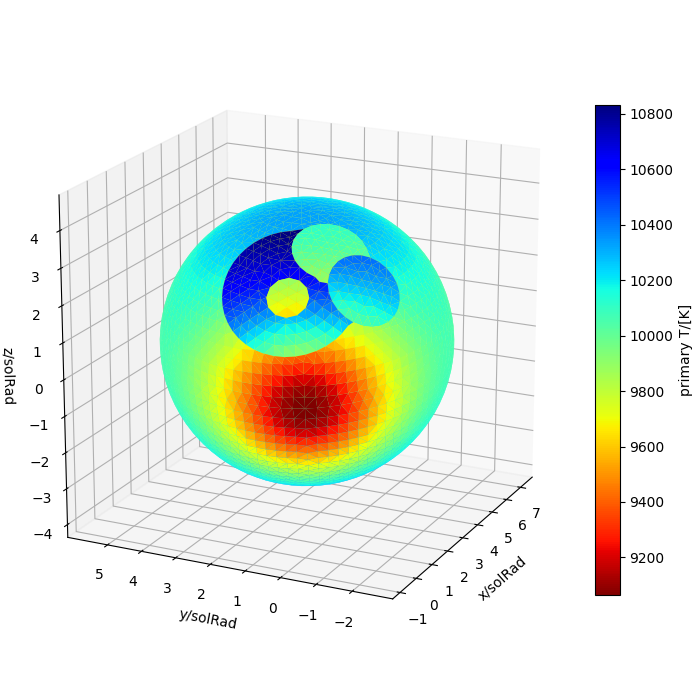

In [9]:
bs.plot.surface(phase=0.05,
                components_to_plot='primary',
                colormap='temperature',
                axis_unit=u.solRad,
                elevation=30,
               )

In some ceses, it is cumbersome to handle surface points, faces and quantities spread over the Star and Spot containers. This can be solved by flattening either the whole `orbital_position_container` or either its components. The flattening can be performed with the idempotent opreation `.flat_it()`:

In [15]:
orbital_position_container.flat_it()

The status of the containers can be checked with the following commands:

In [16]:
orbital_position_container.is_flat()

False